# Image Histograms

- for images, we can display the frequency of value of colors.
- each of the three RGB channels has values between 0-255.
- We can plot these as 3 histograms on top of each other to see how much of each channel there is.

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



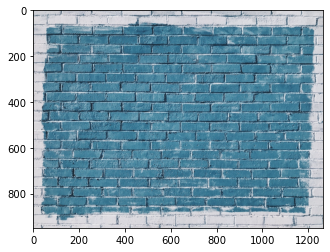

In [35]:
img = cv.imread("../DATA/bricks.jpg")
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(show_img) ;


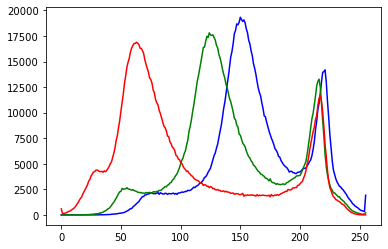

In [37]:
# plotting histogram

# BLUE
blue = cv.calcHist([img],channels=[0], mask = None, histSize=[256], ranges=[0,256])
plt.plot(blue, color = 'blue') ;

# GREEN
green = cv.calcHist([img],channels=[1], mask = None, histSize=[256], ranges=[0,256])
plt.plot(green, color = 'green') ;

# RED
red = cv.calcHist([img],channels=[2], mask = None, histSize=[256], ranges=[0,256])
plt.plot(red, color = 'red') ;

## Histograms on masked portion of the image 

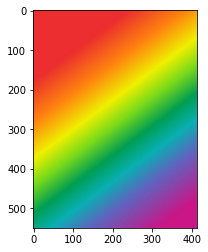

In [39]:
img = cv.imread("../DATA/rainbow.jpg")
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(show_img) ;

In [40]:
img.shape

(550, 413, 3)

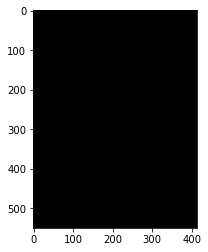

In [43]:
mask = np.zeros(img.shape[:2], np.uint8)
plt.imshow(mask, cmap="gray") ;

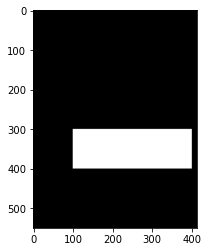

In [44]:
mask[300:400,100:400] = 255
plt.imshow(mask, cmap="gray") ;

In [46]:
# For plotting histogram
masked_img = cv.bitwise_and(img, img, mask=mask)

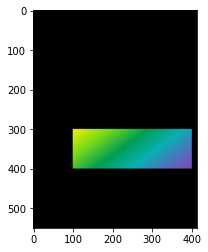

In [45]:
# For showing masked image
show_masked_img = cv.bitwise_and(show_img, show_img, mask = mask)
plt.imshow(show_masked_img) ;

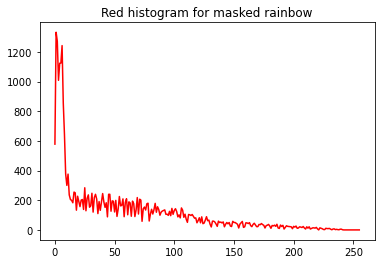

In [48]:
hist_mask_values_red = cv.calcHist([img], channels=[2], mask = mask, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_values_red, color='r') ;
plt.title('Red histogram for masked rainbow') ;

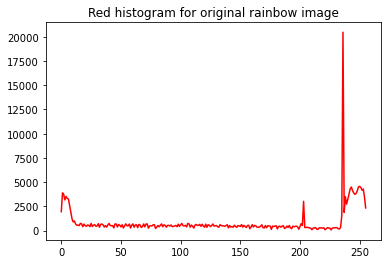

In [49]:
hist_values_red_original = cv.calcHist([img], channels=[2], mask = None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_red_original, color='r') ;
plt.title('Red histogram for original rainbow image') ;


## **Histogram Equalization**

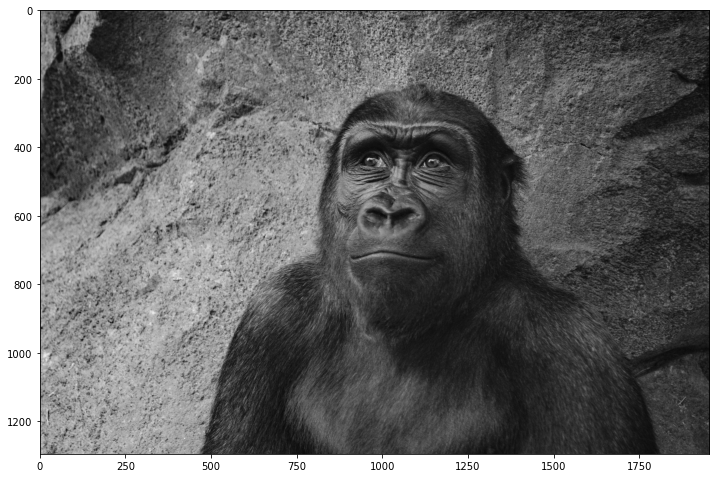

In [50]:
gorilla = cv.imread("../DATA/gorilla.jpg",0)

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    
display_img(gorilla)



In [51]:
gorilla.shape

(1295, 1955)

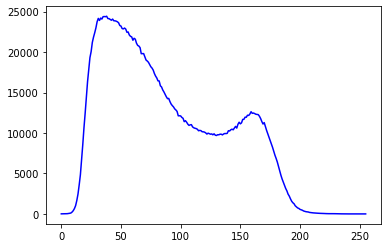

In [56]:
hist_values_gorilla_original = cv.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_gorilla_original, color='b') ;
plt.title('') ;

we can see a lot of lighter color peaking in the graph and less darker colors

-  0 = white
-  250 = black

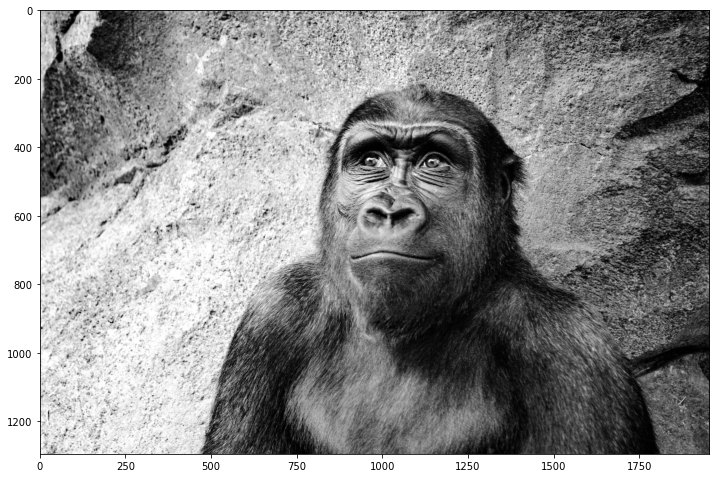

In [58]:
# Equalizing image
gorilla_equalisation = cv.equalizeHist(gorilla)
display_img(gorilla_equalisation)

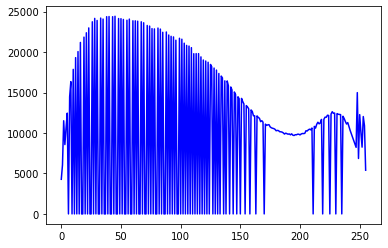

In [60]:
hist_values_gorilla_equalised = cv.calcHist([gorilla_equalisation], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_gorilla_equalised, color='b') ;
plt.title('') ;

We can now see the drop between lighter color(i.e closer to 0) and darker color(i.e closer to 250) has been smoothed out more than before.

## Equalization on color image

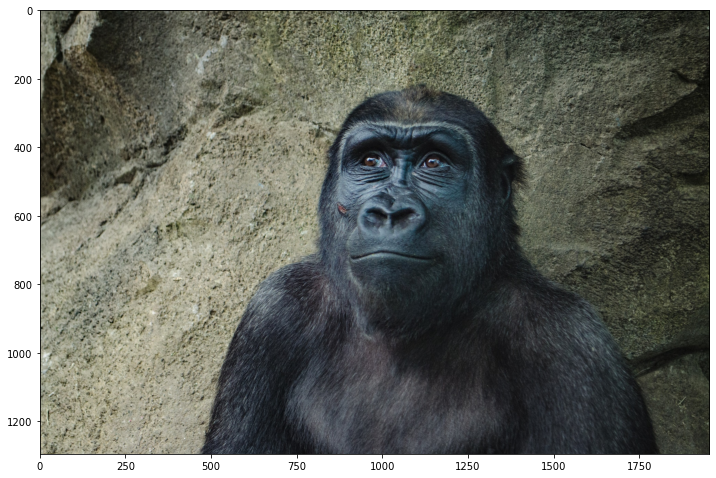

In [61]:
gorilla_color = cv.imread("../DATA/gorilla.jpg")
show_gorilla_color = cv.cvtColor(gorilla_color, cv.COLOR_BGR2RGB)
display_img(show_gorilla_color)

- First change image to HSV version
- Select the value channel from HSV
- Perform equalization
- change from HSV to RGB

In [62]:
hsv = cv.cvtColor(gorilla_color, cv.COLOR_BGR2HSV)

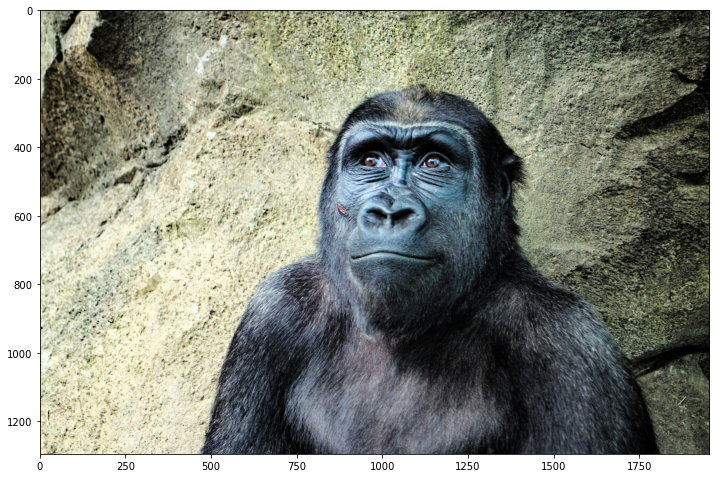

In [63]:
hsv[:,:,2] = cv.equalizeHist(hsv[:,:,2])
gorilla_color_equalisation = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
display_img(gorilla_color_equalisation)
